#Credit Scoring: Predict the probability of going default 
    Algorithm: Logistic Regression (10 features with 1 target)

    Data: https://www.kaggle.com/c/GiveMeSomeCredit
    
    By: Hee Kyung, Yoon

In [2]:
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 0. LOAD DATA
    1. load data
    2. check data

## 1. PROCESS DATA (-> X, y)
    1. split data into training, cross validation and test data sets
    2. splitData to X & y
    3. featureScale


## 2. BUILD FIRST MODEL
    1. Train   
    2. Predict

## 3. EVALUATE MODEL
    Learning Curve
    
## 4. MODIFY MODEL
    1. Add polynomial features
    2. Modify C (regularization term)
    3. Modify Threshold
    4. Modified Model

----------------------------------------------------------------------------------------------------------------------------------------------------

# 0. LOAD DATA
    1. load data
    2. check data

In [3]:
def load(filename):
    '''
    filenname: string ('test.csv')
    
    returns: DataFrame
    '''
    data = pd.DataFrame.from_csv(filename, encoding = 'utf-8')
    print '\nData Columns:'
    for i in range(len(data.columns)):
        print '\t',i,'\t', data.columns[i]

    check(data)
    
    return data

def check(X):
    '''
    X: DataFrame or Series
    
        prints shape and head
    
    returns: None
    '''
    print '\nShape is:\n', X.shape
    print X.head()

data = load('train_stratified_balanced_click.csv')


Data Columns:
	0 	date_time
	1 	site_id
	2 	visitor_location_country_id
	3 	visitor_hist_starrating
	4 	visitor_hist_adr_usd
	5 	prop_country_id
	6 	prop_id
	7 	prop_starrating
	8 	prop_review_score
	9 	prop_brand_bool
	10 	prop_location_score1
	11 	prop_location_score2
	12 	prop_log_historical_price
	13 	position
	14 	price_usd
	15 	promotion_flag
	16 	srch_destination_id
	17 	srch_length_of_stay
	18 	srch_booking_window
	19 	srch_adults_count
	20 	srch_children_count
	21 	srch_room_count
	22 	srch_saturday_night_bool
	23 	srch_query_affinity_score
	24 	orig_destination_distance
	25 	random_bool
	26 	click_bool

Shape is:
(60000, 27)
         date_time  site_id  visitor_location_country_id  \
srch_id                                                    
583604       52062       16                           31   
215209      297501        5                          216   
479029      106840       15                           99   
346736       36761       24                          216

#1. PROCESS DATA (-> X, y)
    1. split data into Training, Cross validation & Test sets
    2. splitData to X & y
    3. featureScale

In [7]:
# 1. Split data into training data, cross validation data, and test data

import random

'''
# Shuffle index
index = np.array(data.index)
random.shuffle(index)

print index.shape
print index

# training set (60%)
trainingSize = data.shape[0] * 0.60
training = data.ix[index[:trainingSize]]

training.to_csv('training.csv', encoding='utf-8')

print '\n', training.shape
print training.head()

# crossValidation set (20%)
crossValSize = data.shape[0] * 0.20
crossValidation = data.ix[index[trainingSize:trainingSize + crossValSize]]

crossValidation.to_csv('crossValidation.csv', encoding='utf-8')

print '\n', crossValidation.shape

# test set (20%)
test = data.ix[index[trainingSize + crossValSize:]]

test.to_csv('test.csv', encoding = 'utf-8')

print '\n', crossValidation.shape
'''

"\n# Shuffle index\nindex = np.array(data.index)\nrandom.shuffle(index)\n\nprint index.shape\nprint index\n\n# training set (60%)\ntrainingSize = data.shape[0] * 0.60\ntraining = data.ix[index[:trainingSize]]\n\ntraining.to_csv('training.csv', encoding='utf-8')\n\nprint '\n', training.shape\nprint training.head()\n\n# crossValidation set (20%)\ncrossValSize = data.shape[0] * 0.20\ncrossValidation = data.ix[index[trainingSize:trainingSize + crossValSize]]\n\ncrossValidation.to_csv('crossValidation.csv', encoding='utf-8')\n\nprint '\n', crossValidation.shape\n\n# test set (20%)\ntest = data.ix[index[trainingSize + crossValSize:]]\n\ntest.to_csv('test.csv', encoding = 'utf-8')\n\nprint '\n', crossValidation.shape\n"

In [8]:
# load split data

training = load('training.csv')
cv = load('crossValidation.csv')
test = load('test.csv')


Data Columns:
	0 	SeriousDlqin2yrs
	1 	RevolvingUtilizationOfUnsecuredLines
	2 	age
	3 	NumberOfTime30-59DaysPastDueNotWorse
	4 	DebtRatio
	5 	MonthlyIncome
	6 	NumberOfOpenCreditLinesAndLoans
	7 	NumberOfTimes90DaysLate
	8 	NumberRealEstateLoansOrLines
	9 	NumberOfTime60-89DaysPastDueNotWorse
	10 	NumberOfDependents

Shape is:
(90000, 11)
        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
42082                  1                              1.173509   33   
47463                  0                              0.040118   67   
6412                   0                              0.228882   68   
142967                 0                              0.558521   50   
51191                  0                              0.000000   65   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
42082                                      3   0.430443           5570   
47463                                      0   0.007237          10500   
6412    

In [5]:
# 2. splitData to X & y

def splitData(Xandy):
    '''
    Xandy:
    
    returns: X, y
    '''
    X = Xandy.iloc[:, :-1]
    #check(Xtrain)

    y = Xandy['click_bool']
    #check(ytrain)
    
    # fill nan with 0
    X = X.fillna(0)
    y = y.fillna(0)
    return X, y



# 3. feature scaling X
def featureScale(X):
    '''
    X: DataFrame
    
    returns: DataFrame (feature scaled)
    '''
    for col in range(X.shape[1]):
        #print 'col index:', col
        copied = X.iloc[:, col]
        #print 'head\n', copied.head()
        #print 'mean: ', copied.mean()
        #print 'std: ', copied.std()
        X.iloc[:, col] = (copied - copied.mean())/copied.std()
    return X

In [6]:
Xtrain, ytrain = splitData(data)

check(Xtrain)
check(ytrain)



Shape is:
(60000, 26)
         date_time  site_id  visitor_location_country_id  \
srch_id                                                    
583604       52062       16                           31   
215209      297501        5                          216   
479029      106840       15                           99   
346736       36761       24                          216   
393868       91489        5                          219   

         visitor_hist_starrating  visitor_hist_adr_usd  prop_country_id  \
srch_id                                                                   
583604                       137                  5491              215   
215209                       326                 12836              132   
479029                       326                 12836               99   
346736                       326                 12836              157   
393868                       326                 12836              219   

         prop_id  prop_starrat

# 2. BUILD FIRST MODEL
    1. Train
        method 1) Manually Implemented
        method 2) LogisticRegression module -> We'll stick to this onward!
    2. Predict

In [11]:
# 1. Train
    # method 1) Manually Implemented

from scipy.optimize import fmin_cg

# Add Bias terms to Xtrain
def addBias(X):
    '''
    X: DataFrame (m * n)
    
        Adds bias terms to the first column
    
    returns: DataFrame (m * (n + 1))
    '''
    X.insert(0, 'Bias', 1)
    return X



# logisticRegression
L = 0.1

def logisticRegression(costfunction, gradFunction, X, y, L):
    '''
    constFunction: function
    X: matrix
    y: vector
    L (lambda): float
    
    returns: vector (theta)
    '''
    initial_theta = np.zeros(n+1)
    args = (X, y, L)
    theta = fmin_cg(f = costFunction, x0 = initial_theta, \
                    fprime = gradFunction, args = args)
    return theta

# costFunction
def costFunction(theta, *args):
    '''
    theta: vector
    X: matrix
    y: vector
    L (lambda): float
    
    returns: float (J)
    '''
    #J = sum(np.multiply(np.log(sigmoid(X.dot(theta))), -y) - \
    #       np.multiply((1 - y),log(1 - sigmoid(X.dot(theta)))))/m 
    theta = theta.reshape((n+1, 1))
    
    X, y, L = args
    y = pd.DataFrame(y)
    y = y.rename(columns = {'SeriousDlqin2yrs':0})
    
    J = np.log(sigmoid(X.dot(theta))).T.dot(-y)
    #print '1',J
    J = J - pd.DataFrame(1 - y).T.dot(np.log(1 - sigmoid(X.dot(theta))))
    #print '2', J
    J = np.sum(J)/m
    #print '3', J
    J = J + (L/(2.0*m)) * np.sum(theta[1:]**2)
    #print '4',J
    
    return np.array(J)

# gradFunction
def gradFunction(theta, *args):
    # grad = transpose(sigmoid(X * y)) * y + lambda * sum(theta[1:])/m
    theta = theta.reshape((n+1, 1))
    
    X, y, L = args
    y = pd.DataFrame(y)
    y = y.rename(columns = {'SeriousDlqin2yrs':0})
    
    grad = X.T.dot(sigmoid(X.dot(theta)) - pd.DataFrame(y))/m
    #print grad.shape
    
    # Regularize
    theta = (L/m)*theta
    theta[0] = 0
    #print theta.shape
    #print theta
    
    grad = np.array(grad + theta)
    grad = grad.reshape(n+1)
    
    return grad

# sigmoid
def sigmoid(z):
    '''
    x: float
    
    returns: float
    '''
    return 1.0/(1.0 + np.exp(-z))


In [12]:
# 1. Train
    # method 2) LogisticRegression Module

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [14]:
# 2. Predict

from sklearn.metrics import precision_recall_fscore_support

def predict(clf, X, y, threshold = 0.5):
    '''
    clf
    X
    y
    threshold
    
        prints measures (accuracy, precision, recall, F-score)
    
    returns: prediction(vector) 
            
    '''
    # get prediction
    prediction = getPrediction(clf, X, threshold)
    
    # get measures
    measures = getMeasures(y, prediction)
    accuracy, precision, recall, fscore = measures
    
    print '\naccuracy', accuracy
    print 'precision', precision
    print 'recall', recall
    print 'fscore', fscore
    
    return prediction

def getPrediction(clf, X, threshold = 0.5):
    '''
    clf: LogisticRegression()
    X
    threshold
    
    return: prediction (label vector)
    '''
    proba = clf.predict_proba(X)[:,1]
    return (proba > threshold) * 1

def getMeasures(y, prediction):
    '''
    
    returns: measures
    '''
    accuracy = (prediction == y).mean()
    
    precision, recall, f_score, support = \
        precision_recall_fscore_support(y, prediction, average = 'binary')
    
    measures = (accuracy, precision, recall, f_score)
    return measures

In [20]:
prediction = predict(clf, Xtest, ytest)
print '\n', prediction


accuracy 0.9336
precision 0.544871794872
recall 0.0423728813559
fscore 0.0786308973173

[0 0 0 ..., 0 0 0]


#3. Evaluate Model
    Learning Curve

In [91]:
def learningCurve(listOfNum, Xtrain, ytrain, Xcv, ycv, C = 1):
    '''
        prints learning curve
    returns: None
    '''
    accuracyTList = []
    accuracyCvList = []
    fscoreTList = []
    fscoreCvList = []
    
    clf = LogisticRegression(C = C)
    
    for i in listOfNum:
        # slice training examples       
        Xt_part = Xtrain.iloc[0:i,:]
        yt_part = ytrain.iloc[0:i]
        
        # train
        clf.fit(Xt_part, yt_part)
        
        # predict & get accuracy
        accuracy, precision, recall, fscore = getMeasures(yt_part, \
                                                  getPrediction(clf, Xt_part))
        accuracyCv, precisionCv, recallCv, fscoreCv = getMeasures(ycv, \
                                                  getPrediction(clf, Xcv))
        
        accuracyTList.append(accuracy)
        accuracyCvList.append(accuracyCv)
        fscoreTList.append(fscore)
        fscoreCvList.append(fscoreCv)
        
        print accuracy, accuracyCv

    # plot learning curve
    plt.plot(listOfNum, accuracyTList, label = 'Accuracy Train')
    plt.plot(listOfNum, accuracyCvList, label = 'Accuracy Cv')
    #plt.plot(listOfNum, fscoreTList, label = 'Fscore Train')
    #plt.plot(listOfNum, fscoreCvList, label = 'Fscore Cv')
    
    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("# of train data")
    plt.ylabel("Accuracy")
    plt.title("Learning Curve")
    
    
    return

0.98 0.931166666667
0.937647058824 0.931733333333
0.93495049505 0.932033333333
0.934370860927 0.932366666667
0.93368159204 0.932766666667
0.934780876494 0.932766666667
0.933687707641 0.932766666667
0.933703703704 0.932666666667
0.934064837905 0.932733333333
0.933680709534 0.932733333333
0.934111776447 0.9328
0.934083484574 0.9328
0.933793677205 0.932666666667
0.934055299539 0.9327
0.934194008559 0.932766666667
0.934167776298 0.932666666667
0.93429463171 0.932733333333
0.93428907168 0.9327


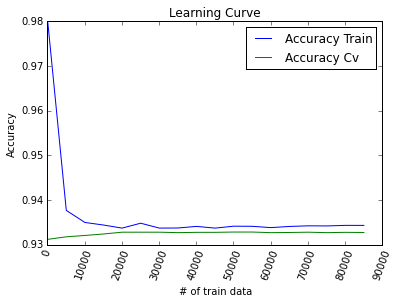

In [92]:
learningCurve(range(100, 90000, 5000), Xtrain, ytrain, Xcv, ycv, C = 1)

# 4. MODIFY MODEL
    1. Modify Threshold
    2. Add polynomial features
    3. Modify C (regularization term)
    4. Modified Model

###1. Modify Threshold

In [63]:
# 3. Threshold

def bestThreshold(listOfNum, Xtrain, ytrain, Xcv, ycv, C):
    '''
    returns: float, best Threshold
    '''
    fscoreList = []
    accuracyList = []

    for i in listOfNum:

        # 1 train
        clf = LogisticRegression(C = C)
        clf.fit(Xtrain, ytrain)

        # 2 get measures
        accuracy, precision, recall, fscore = getMeasures(ycv, \
                                                          getPrediction(clf, Xcv, threshold = i))

        fscoreList.append(fscore)
        accuracyList.append(accuracy)

        print "\nWhen Threshold is %f, accuracy is %f and fscore is %f." % (i, accuracy, fscore)

    # plot learning curve
    plt.plot(listOfNum, fscoreList, label = 'F-score')
    plt.plot(listOfNum, accuracyList, label = 'Accuracy')

    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("Threshold")
    plt.ylabel("F-score")
    plt.title("Threshold - F-score relationship")
    
    maxFscore = max(fscoreList)
    maxIndex = fscoreList.index(maxFscore)

    return listOfNum[maxIndex]


When Threshold is 0.000000, accuracy is 0.068300 and fscore is 0.127867.

When Threshold is 0.025000, accuracy is 0.157667 and fscore is 0.129821.

When Threshold is 0.050000, accuracy is 0.503633 and fscore is 0.173686.

When Threshold is 0.075000, accuracy is 0.732833 and fscore is 0.229549.

When Threshold is 0.100000, accuracy is 0.867733 and fscore is 0.297202.

When Threshold is 0.125000, accuracy is 0.905400 and fscore is 0.315815.

When Threshold is 0.150000, accuracy is 0.918733 and fscore is 0.304224.

When Threshold is 0.175000, accuracy is 0.925167 and fscore is 0.275573.

When Threshold is 0.200000, accuracy is 0.927833 and fscore is 0.252159.

When Threshold is 0.225000, accuracy is 0.930300 and fscore is 0.231533.

When Threshold is 0.250000, accuracy is 0.932033 and fscore is 0.215467.

When Threshold is 0.275000, accuracy is 0.932833 and fscore is 0.201348.

When Threshold is 0.300000, accuracy is 0.932533 and fscore is 0.177904.

When Threshold is 0.325000, accuracy 

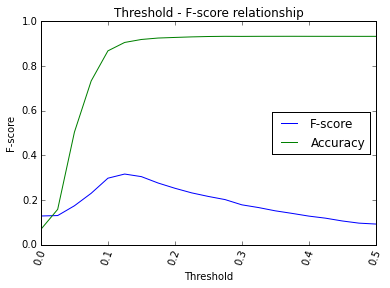

In [64]:
bestT = bestThreshold(np.linspace(0, 0.5, 21), Xtrain, ytrain, Xcv, ycv, C = 2)
print '\nThreshold that maximizes F-score >>', bestT

###2. Add polynomial features
        1) add polynomial features
        2) find optimum polynomial term

In [7]:
# 1) add polynomial features

from sklearn.preprocessing import PolynomialFeatures

def polyFeature(level, X):
    '''
    level: int >=1
    X
    
    returns: X with polynomial features
    '''
    
    poly = PolynomialFeatures(level)
    Xpoly = poly.fit_transform(X)
    
    return Xpoly

In [10]:
XtrainPoly = polyFeature(2, Xtrain)
XtrainPoly.shape

(60000, 378)

In [69]:
# 2) find optimum polynomial term

def bestPoly(listOfNum, Xtrain, ytrain, Xcv, ycv, C = 1, threshold = 0.5):
    '''
        prints Polynomial term - F-score relationship
    returns: int, best polynomial term
    '''
    
    accuracyList = []
    fscoreList = []

    for i in listOfNum:
        print 'Polynomial %d' % i
        
        # 1 add polynomial terms
        XtrainPoly = polyFeature(i, Xtrain)
        XcvPoly = polyFeature(i, Xcv)

        # 2 train
        clf = LogisticRegression(C = C)
        clf.fit(XtrainPoly, ytrain)

        # 3 get measures
        accuracy, precision, recall, fscore = getMeasures(ycv, getPrediction(clf, XcvPoly, threshold))
        
        accuracyList.append(accuracy)
        fscoreList.append(fscore)
    
    # plot relationship
    plt.figure()
    plt.plot(listOfNum, fscoreList, label = 'F-score')
    plt.plot(listOfNum, accuracyList, label = 'Accuracy')

    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("Polynomial term")
    plt.ylabel("F-score")
    plt.title("Polynomial term - F-score relationship")
    
    maxFscore = max(fscoreList)
    maxIndex = fscoreList.index(maxFscore)
    
    return listOfNum[maxIndex]

Polynomial 1
Polynomial 2
Polynomial 3

Polynomial term that maximizes F-score >> 2


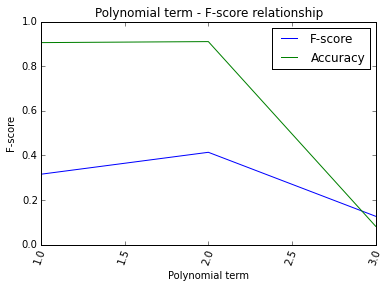

In [70]:
bestP = bestPoly(range(1,4), Xtrain, ytrain, Xcv, ycv, C = 1, threshold = bestT)
print '\nPolynomial term that maximizes F-score >>', bestP

###3. Modify C (regularization term)

In [65]:
# 3. Modify C

def bestC(listOfNum, Xtrain, ytrain, Xcv, ycv, threshold = 0.5):
    accuracyList = []
    fscoreList = []
    
    for i in listOfNum:

        # 1 train
        clf = LogisticRegression(C = i)
        clf.fit(Xtrain, ytrain)

        # 2 get measures
        accuracy, precision, recall, fscore = getMeasures(ycv, \
                                                          getPrediction(clf, Xcv, threshold))
        accuracyList.append(accuracy)
        fscoreList.append(fscore)

        print '\nWhen C = %d, accuracy is %f and f-score is %f.' % (i, accuracy, fscore)
    
    # plot relationship
    plt.figure()
    plt.plot(listOfNum, fscoreList, label = 'F-score')
    plt.plot(listOfNum, accuracyList, label = 'Accuracy')

    plt.legend(loc='best')
    plt.xticks(rotation=70) 
    plt.xlabel("C")
    plt.ylabel("F-score")
    plt.title("C - F-score relationship")

    maxFscore = max(fscoreList)
    maxIndex = fscoreList.index(maxFscore)

    return listOfNum[maxIndex]


When C = 1, accuracy is 0.911000 and f-score is 0.403485.

When C = 2, accuracy is 0.913200 and f-score is 0.401379.

When C = 3, accuracy is 0.911433 and f-score is 0.407317.

When C = 4, accuracy is 0.911867 and f-score is 0.358564.

When C = 5, accuracy is 0.910567 and f-score is 0.356749.

When C = 6, accuracy is 0.912667 and f-score is 0.400458.

When C = 7, accuracy is 0.904300 and f-score is 0.345268.

When C = 8, accuracy is 0.915067 and f-score is 0.394774.

When C = 9, accuracy is 0.912100 and f-score is 0.398083.

When C = 10, accuracy is 0.913300 and f-score is 0.358253.

C that maximizes F-score >> 3.0


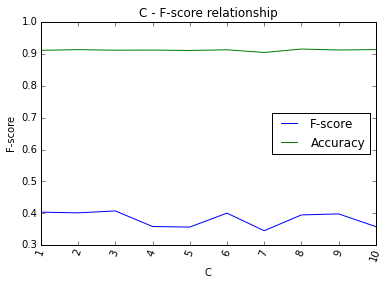

In [72]:
XtrainPoly = polyFeature(bestP, Xtrain)
XcvPoly = polyFeature(bestP, Xcv)

bestc = bestC(np.linspace(1, 10, 10), XtrainPoly, ytrain, XcvPoly, ycv, threshold = bestT)
print '\nC that maximizes F-score >>', bestc

### 4. Modified Model
    Train again with modified parameters
    (Higher f-score expected, in sacrifice of accuracy)
    1. Modified Threshold: 0.125
    2. Modified Polynomial Term: 2
    3. Modified C: 3

In [27]:
print XtrainPoly.shape, np.array(ytrain).reshape(60000, 1).shape
polyall = np.concatenate((XtrainPoly, np.array(ytrain).reshape(60000, 1)), axis = 1)
polyall.shape

(60000, 378) (60000, 1)


(60000, 379)

In [29]:
np.savetxt('polyTrain.csv', XtrainPoly, delimiter=',')

In [13]:
# 1. Modified Threshold: 0.125
#bestT

# 2. Modified polynomial term: 2
#XtrainPoly = polyFeature(bestP, Xtrain)
#XtestPoly = polyFeature(bestP, Xtest)

# 3. Modified C: 3
#bestc

# Modified Model
    # Train
clf = LogisticRegression()
clf.fit(XtrainPoly, ytrain)

    # Predict
bestPrediction = predict(clf, XtrainPoly, ytrain, threshold = 0.5)

NameError: name 'predict' is not defined

In [15]:
bestPrediction = predict(clf, XtrainPoly, ytrain, threshold = 0.5)

ValueError: Mix of label input types (string and number)